# Heart Disease - A Classification Analysis

## Author : Neelesha Maiti

### Introduction

The human heart is an organ that pumps blood throughout the body via the circulatory system, supplying oxygen and nutrients to the tissues and removing carbon dioxide and other wastes. The heart muscle needs oxygen to survive. A heart attack occurs when the blood flow that brings oxygen to the heart muscle is severely reduced or cut off completely.

In this project data has been collected on presence and absence of heart disease and the various factors involved in it. 


### Dataset 

Heart Disease Data set by UCI Machine Learning repository: https://archive.ics.uci.edu/ml/datasets/heart+disease 

Dataset columns: 

	age: The person’s age in years

	sex: The person’s sex (1 = male, 0 = female)

	cp: chest pain type
    
   — Value 0: asymptomatic , Value 1: atypical angina , Value 2: non-anginal pain , Value 3: typical angina

	trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)

	chol: The person’s cholesterol measurement in mg/dl

	fbs: The person’s fasting blood sugar (> 120 mg/dl)
    
   — Value 1 = true , Value 0 = false
   
	restecg: resting electrocardiographic results

   — Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria , Value 1: normal , Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   
	thalach: The person’s maximum heart rate achieved

	exang: Exercise induced angina 

   — 1: yes, 0: no

	oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)

	slope: the slope of the peak exercise ST segment 

   — 0: downsloping , 1: flat , 2: upsloping
   
	ca: The number of major vessels (0 –3) coloured by fluoroscopy

	thal: A blood disorder called thalassemia 

   —Value 0: NULL (dropped from the dataset previously , Value 1: fixed defect (no blood flow in some part of the heart) , Value 2: normal blood flow , Value 3: reversible defect (a blood flow is observed but it is not normal)
   
	target: Heart disease  

   —1 = no , 0= yes
   
This is multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has a heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

We proceed towards analysis of the data using R. 

#### Libraries loaded 

In [1]:
library(ggplot2)
library(ggpubr)
library(ggcorrplot)
library(leaps)
library(caret)
library(MASS)
library(tree)
library(randomForest)
library(pROC)
library(e1071)
set.seed(seed=987)

Loading required package: lattice

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




#### Data Content

In [2]:
df=read.csv("heart.csv")
colnames(df)[1] = "age"
head(df)
dim(df)
str(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


[1] 303  14

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : int  1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : int  3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : int  0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : int  0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : int  1 2 2 2 2 1 2 3 3 2 ...
 $ target  : int  1 1 1 1 1 1 1 1 1 1 ...


#### Checking for missing values

In [3]:
sum(is.na(df))

[1] 0

We see that there are no null values in the data

In [4]:
summary(df)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

#### Data Categorization

In [5]:
df$sex <- ifelse(df$sex == 1,'male', 'female')
df$target <- ifelse(df$target == 1, 'present', 'absent')
df$fbs <- ifelse(df$fbs == 1, ">120 mg/dl", "<=120 mg/dl")
df$exang <- ifelse(df$exang == 1, "yes" ,"no")
df$cp <- ifelse(df$cp == 0, "typical angina",ifelse(df$cp == 1, "atypical angina", ifelse(df$cp == 2, "non-anginal pain", "asymptomatic")))
df$restecg <- ifelse(df$restecg == 0, "normal",ifelse(df$restecg == 1, "abnormality", "probable or definite"))
df$slope <- ifelse(df$slope == 0, "upsloping",ifelse(df$slope ==1, "flat value", "downsloping"))

for(i in 1 : ncol(df)){
  if(length(names(table(df[,i]))) <= 5){
    df[,i] <- as.factor(df[,i])
  }
}

str(df)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 1 2 2 2 ...
 $ cp      : Factor w/ 4 levels "asymptomatic",..: 1 3 2 2 4 4 2 2 3 3 ...
 $ trestbps: int  145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : int  233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : Factor w/ 2 levels "<=120 mg/dl",..: 2 1 1 1 1 1 1 1 2 1 ...
 $ restecg : Factor w/ 3 levels "abnormality",..: 2 1 2 1 1 1 2 1 1 1 ...
 $ thalach : int  150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak : num  2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : Factor w/ 3 levels "downsloping",..: 3 3 1 1 1 2 2 1 1 1 ...
 $ ca      : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ thal    : Factor w/ 4 levels "0","1","2","3": 2 3 3 3 3 2 3 4 4 3 ...
 $ target  : Factor w/ 2 levels "absent","present": 2 2 2 2 2 2 2 2 2 2 ..

#### Exploratory Data Analysis

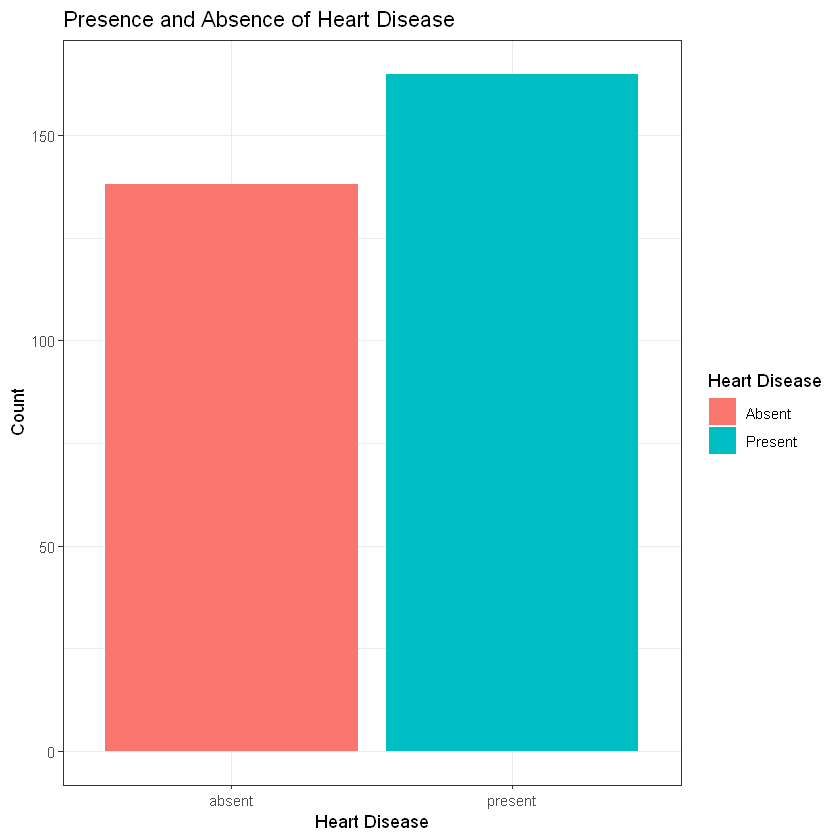

In [6]:
#Bar plot for Target 
ggplot(df , aes(x = target,fill = target)) + geom_bar() + xlab("Heart Disease") + ylab("Count") + ggtitle("Presence and Absence of Heart Disease") + scale_fill_discrete(name = "Heart Disease" , labels = c("Absent","Present")) + theme_bw()

Observation: A primary observation is made showing that in the dataset, the number of people having heart disease is slightly greater than the number of people not having heart disease.

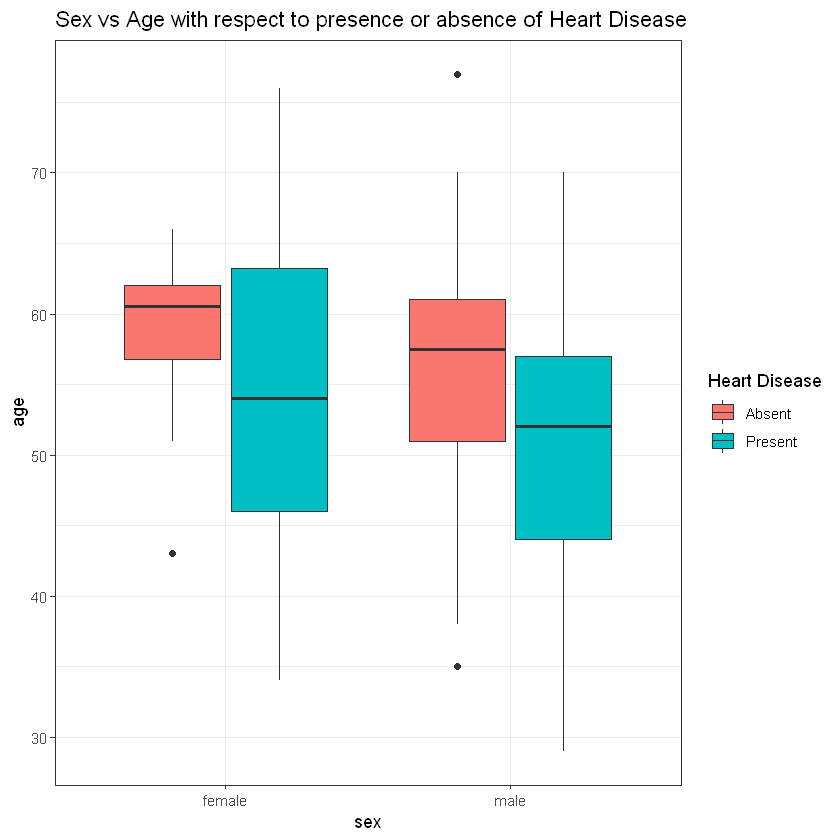

In [7]:
#Box plot comparing age and sex with respect to target
ggplot(df, aes(x = sex, y = age, fill = target)) + geom_boxplot() + scale_fill_discrete(name = "Heart Disease", labels = c("Absent","Present")) + scale_x_discrete(labels = c("0" = "Female","1" = "Male")) + ggtitle("Sex vs Age with respect to presence or absence of Heart Disease") + theme_bw()

Observation: In the above boxplots, it is seen that for females, the presence of heart disease varies over a wide range of age than its absence with median around 55 and for males, the presence of heart disease varies over ages 65 to 52 (approx.) while it is seen to be absent for a relatively younger age group. 

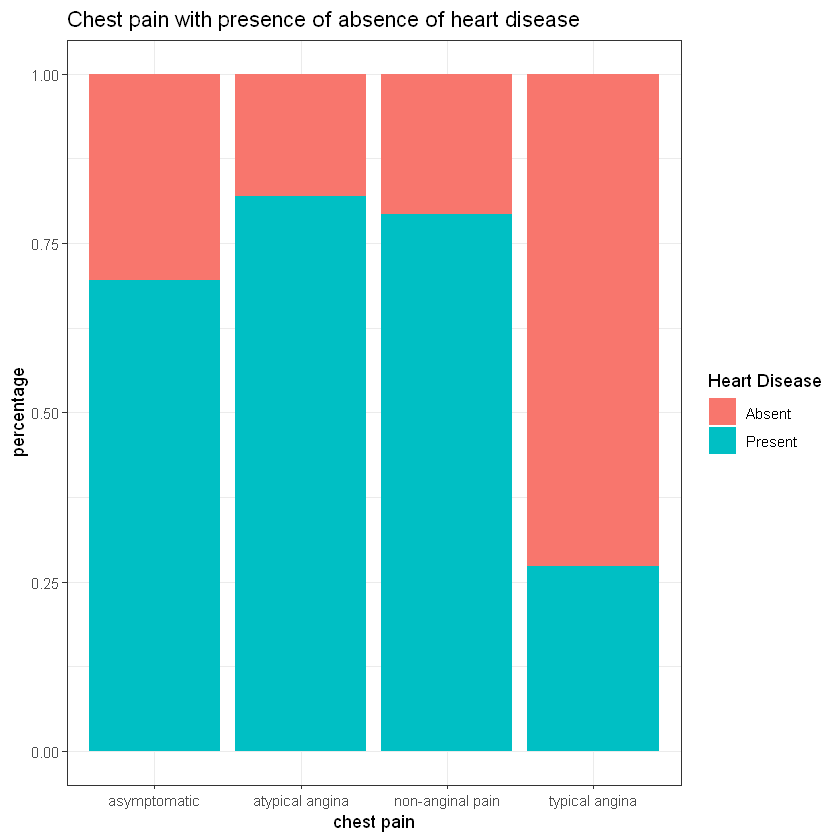

In [8]:
#Plot showing Chest pain of different types with target
ggplot(df , aes(cp , fill = target)) + geom_bar(position = "fill") + xlab("chest pain") + scale_x_discrete(labels = c("0" = "typical angina" , "1" = "atypical angina","2" = "non-anginal pain" , "3" = "asymptomatic")) +ylab("percentage") + ggtitle("Chest pain with presence of absence of heart disease") + scale_fill_discrete(name = "Heart Disease" , labels = c("Absent" , "Present")) + theme_bw()

Observation: The percentage of heart disease patients with 'asymptomatic', 'atypical angina' and 'non-anginal' chest pain is high while for 'typical angina' the percentage of patients without heart disease is higher. 

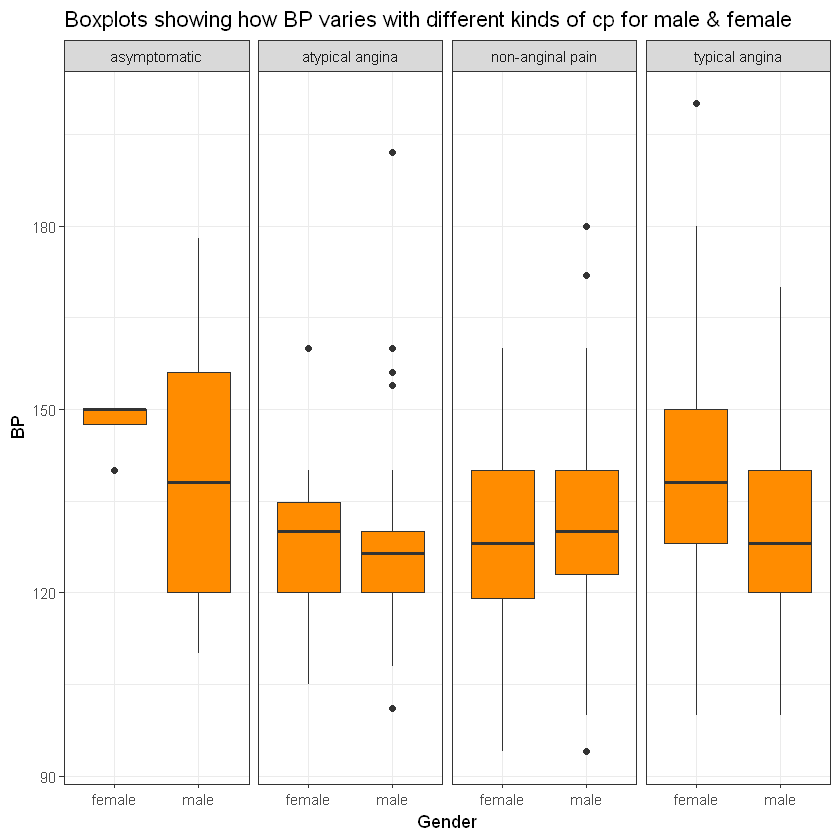

In [9]:
# Boxplots comparing BP for different kinds of chest pain for male and female
cp.labs = c("typical angina","atypical angina","non-anginal pain","asymptomatic")
names(cp.labs) = c("typical angina","atypical angina","non-anginal pain","asymptomatic")
ggplot(df, aes(x = sex,y = trestbps)) + geom_boxplot(fill = "darkorange") + xlab("Gender") + ylab("BP") + facet_grid(~cp, labeller = labeller(cp = cp.labs)) + ggtitle("Boxplots showing how BP varies with different kinds of cp for male & female") + theme_bw()

Observation: There is a large variation of blood pressure among the males with 'asymptotic' chest pain than with females. For the remaining types of chest pains male and female have more or less same range of blood pressures. It is also observed there are a few outliers for 'atypical anginal' as well as non anginal chest pains.

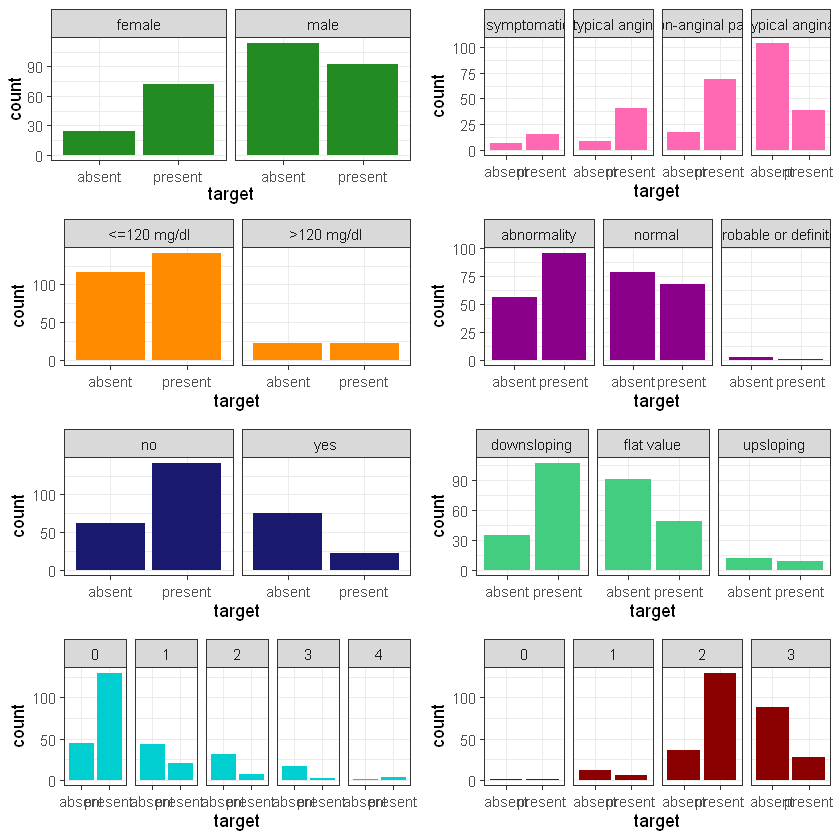

In [10]:
#Plot showing how target is varying with all the catagorical variables in the data
p0 <- ggplot(df,aes(x=target))+facet_grid(~sex)+geom_bar(fill="forestgreen") + theme_bw()
p1 <- ggplot(df,aes(x=target))+facet_grid(~cp)+geom_bar(fill="hotpink") + theme_bw()
p2 <- ggplot(df,aes(x=target))+facet_grid(~fbs)+geom_bar(fill="darkorange") + theme_bw()
p3 <- ggplot(df,aes(x=target))+facet_grid(~restecg)+geom_bar(fill="darkmagenta") + theme_bw()
p4 <- ggplot(df,aes(x=target))+facet_grid(~exang)+geom_bar(fill="midnightblue") + theme_bw()
p5 <- ggplot(df,aes(x=target))+facet_grid(~slope)+geom_bar(fill="seagreen3") + theme_bw()
p6 <- ggplot(df,aes(x=target))+facet_grid(~ca)+geom_bar(fill="darkturquoise") + theme_bw()
p7 <- ggplot(df,aes(x=target))+facet_grid(~thal)+geom_bar(fill="red4") + theme_bw()
ggarrange(p0,p1,p2,p3,p4,p5,p6,p7,nrow=4,ncol=2)

Observation: 

In p0, number of males with heart disease is greater than the number of females. 

In p1, 'asymptomatic', 'atypical' and 'non anginal' chest pains have same kind of pattern with higher number of patients with heart disease than its absence, but is opposite for 'typical angina'. 

In p2, greater number of people have heart disease with fasting blood sugar <=120mg/dl. 

In p3, abnormality and normal have higher proportion of heart disease than probable or definite which is significantly low. 

In p4, the people with 'no excercise indused angina' have higher rate of presence of heart disease than the ones with 'exercise indiced angina'. 

In p5, the slope of peak exercise ST segment which is downsloping has higher rate of heart disease , for flat slope absence of heart diesase is in greater count and is almost insignificant in upsloping. 

In p6, number of major vessels coloured by fluroscopy having value 0 has higher rate of heart disease and it significantly decreases in the rest. 

In p7, people with fixed defect of thalassemia have higher rate of heart disease while it is opposite in case of reversable defect and is almost insignificant in the rest cases.

#### Correlation matrix of the continuous variables 

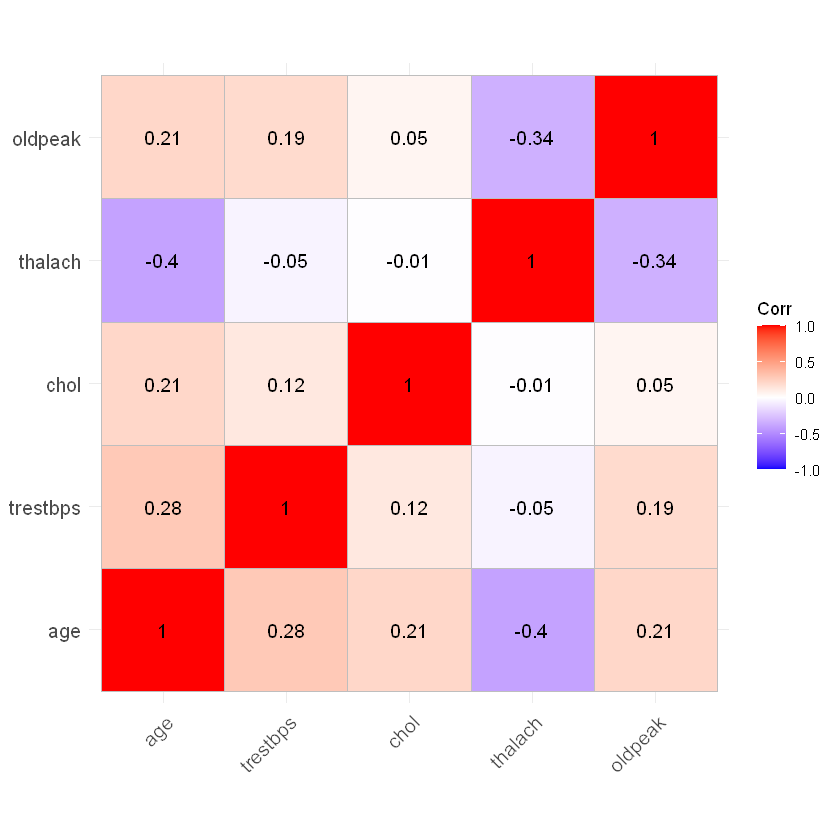

In [11]:
c=cor(df[,c("age","trestbps","chol","thalach","oldpeak")])
ggcorrplot(corr = c,lab = T)

Observation: From the correlation matrix, we observe that not any two variables are highly correlated. However, it is to be noted that 'thalach' and 'age' have correlation coefficient of -0.4 which shows that there is a moderate negative correlation. 'Oldpeak' and 'thalach' also show a similar kind of relationship. A few of the pairs also show slight positive correlation.

#### One Hot Encoding

Now, we encode our categorical variables that have more than two categories.

In [12]:
to_dummy <- data.frame(df$cp,df$restecg,df$slope,df$ca,df$thal)
dmy <- dummyVars(" ~ .", data = to_dummy)
df2 <- data.frame(predict(dmy, newdata = to_dummy))
df2 <- df2[, !(colnames(df2) %in% c("df.cp.typical.angina", "df.restecg.normal","df.slope.flat.value","df.ca.0","df.thal.0"))]
df <- df[,!(colnames(df) %in% c("cp","restecg","slope","ca","thal"))]
df <- cbind(df, df2)
head(df)
dim(df)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,df.cp.asymptomatic,...,df.restecg.probable.or.definite,df.slope.downsloping,df.slope.upsloping,df.ca.1,df.ca.2,df.ca.3,df.ca.4,df.thal.1,df.thal.2,df.thal.3
,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<fct>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,63,male,145,233,>120 mg/dl,150,no,2.3,present,1,...,0,0,1,0,0,0,0,1,0,0
2,37,male,130,250,<=120 mg/dl,187,no,3.5,present,0,...,0,0,1,0,0,0,0,0,1,0
3,41,female,130,204,<=120 mg/dl,172,no,1.4,present,0,...,0,1,0,0,0,0,0,0,1,0
4,56,male,120,236,<=120 mg/dl,178,no,0.8,present,0,...,0,1,0,0,0,0,0,0,1,0
5,57,female,120,354,<=120 mg/dl,163,yes,0.6,present,0,...,0,1,0,0,0,0,0,0,1,0
6,57,male,140,192,<=120 mg/dl,148,no,0.4,present,0,...,0,0,0,0,0,0,0,1,0,0


[1] 303  23

In [13]:
attach(df)

#### Feature Selection

We have usedd Best Subset Method and Bayesian Information Criterion (BIC) for selecting the features for our analysis.

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 10

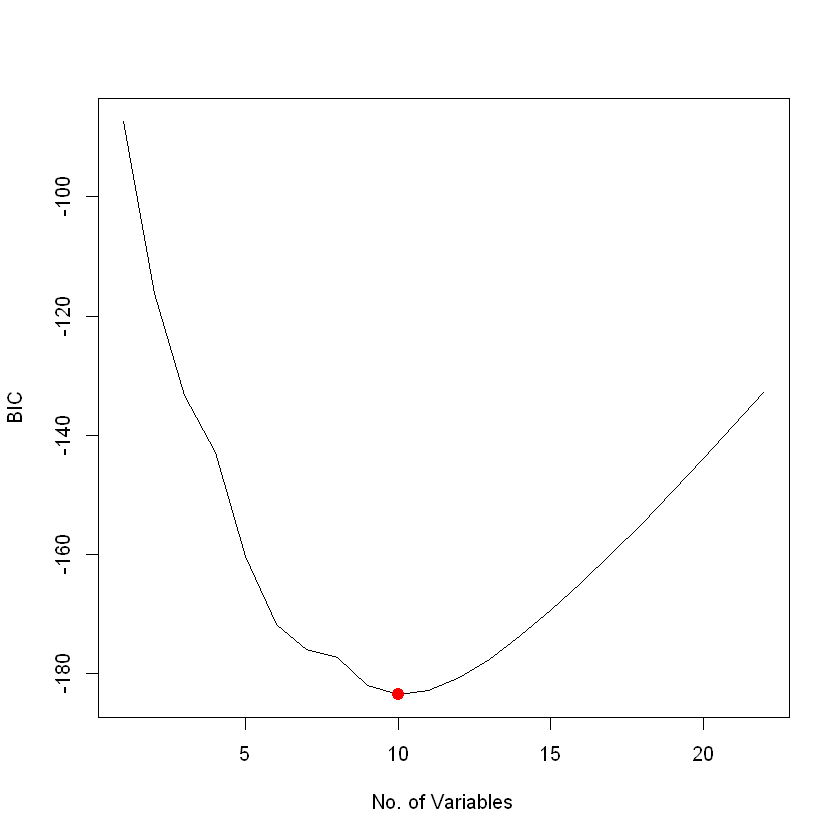

In [14]:
reg_full <- regsubsets(target~.,data=df,nvmax=23)
s_full<- summary(reg_full)
names(s_full)
which.min(s_full$bic)
plot(s_full$bic,xlab ="No. of Variables",ylab=expression(paste("BIC")),type="l")
points(10,s_full$bic[10],col="red",cex=2,pch=20)

Observation: We can see that for 10 variables the BIC value is minimum.

In [15]:
names(coef(reg_full,10))[-1]

[1] "sexmale"                "exangyes"               "df.cp.asymptomatic"    
 [4] "df.cp.atypical.angina"  "df.cp.non.anginal.pain" "df.slope.downsloping"  
 [7] "df.ca.1"                "df.ca.2"                "df.ca.3"               
[10] "df.thal.3"

Now, we are ready with our final dataset for further analysis.

In [16]:
df_new = df[,-c(1,3,4,5,6,8,13,14,16,20,21,22)]
head(df_new)
dim(df_new)

,sex,exang,target,df.cp.asymptomatic,df.cp.atypical.angina,df.cp.non.anginal.pain,df.slope.downsloping,df.ca.1,df.ca.2,df.ca.3,df.thal.3
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,male,no,present,1,0,0,0,0,0,0,0
2,male,no,present,0,0,1,0,0,0,0,0
3,female,no,present,0,1,0,1,0,0,0,0
4,male,no,present,0,1,0,1,0,0,0,0
5,female,yes,present,0,0,0,1,0,0,0,0
6,male,no,present,0,0,0,0,0,0,0,0


[1] 303  11

In our final data we have 11 columns.

### Data Analysis

#### Splitting the Data

In [17]:
ind1=sample(1:nrow(df_new),floor(0.6*nrow(df_new)))
train=df_new[ind1,]
rem=df_new[-ind1,]
ind2=sample(1:nrow(rem),floor(0.5*nrow(rem)))
cv=rem[ind2,]
test=rem[-ind2,]
obs_target=cv$target
print("The data is successfully split into Train, Test and Cross Validation Set")

[1] "The data is successfully split into Train, Test and Cross Validation Set"


#### Logistic Regression 

In [18]:
logistic_fit <- glm(target~.,data = train,family="binomial")
logistic_pred <- rep("absent", nrow(cv))
pred_prob <- predict(logistic_fit, newdata = cv, type = "response")
logistic_pred [pred_prob > 0.5] = "present"
temp1 = table(logistic_pred, obs_target)
temp1
paste("Accuracy of the logistic regression model is: ",mean(logistic_pred == obs_target))

             obs_target
logistic_pred absent present
      absent      23       3
      present      3      32

[1] "Accuracy of the logistic regression model is:  0.901639344262295"

In [19]:
precision1 = temp1[2,2]/(temp1[2,2]+temp1[2,1])
recall1 = temp1[2,2]/(temp1[2,2]+temp1[1,2])
fscore1 = (2*precision1*recall1)/(precision1+recall1)
misclassification.rate.logistic = (mean(logistic_pred != obs_target))*100
paste("Misclassification Error Rate for Logistic Regression is",misclassification.rate.logistic,"%")
paste("The f1 score for Logistic Regression is ",fscore1)

[1] "Misclassification Error Rate for Logistic Regression is 9.83606557377049 %"

[1] "The f1 score for Logistic Regression is  0.914285714285714"

#### Decision Tree Classifier


Classification tree:
tree(formula = target ~ ., data = train, method = "class")
Variables actually used in tree construction:
[1] "exang"                  "df.thal.3"              "sex"                   
[4] "df.cp.non.anginal.pain" "df.ca.1"                "df.slope.downsloping"  
Number of terminal nodes:  10 
Residual mean deviance:  0.8661 = 148.1 / 171 
Misclassification error rate: 0.2099 = 38 / 181 

           obs_target
pred_target absent present
    absent      22      11
    present      4      24

[1] "Accuracy of the decision tree classifier model is:  0.754098360655738"

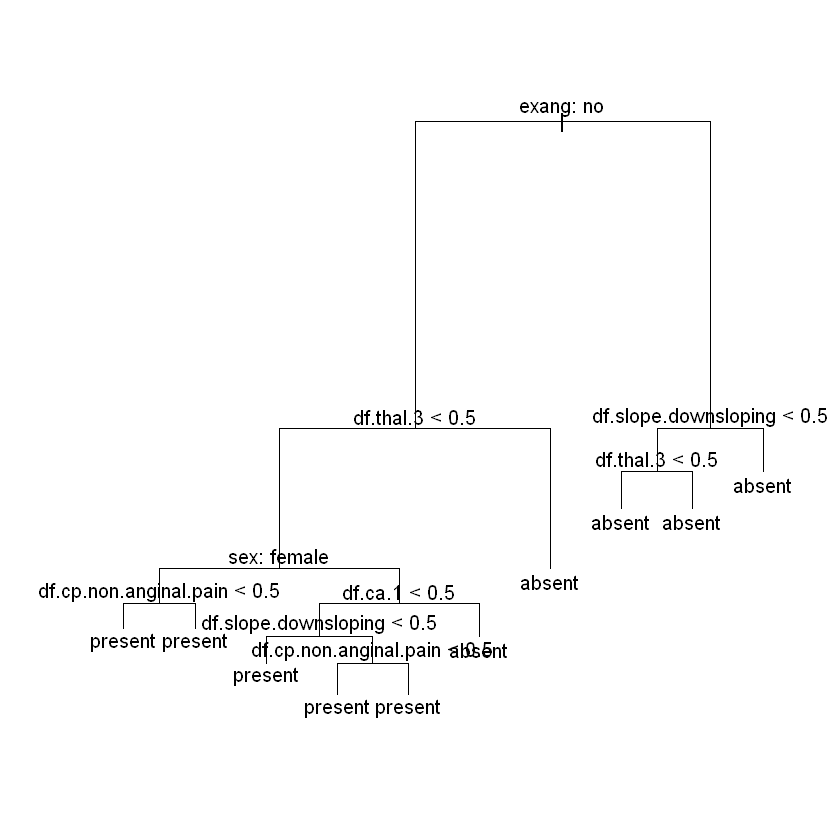

In [20]:
tree_fit <- tree(target ~., train , method="class")
summary(tree_fit)
plot(tree_fit)
text(tree_fit, pretty=0, cex=1)
tree_pred <- predict(tree_fit, cv, type="class")
temp2 = table(pred_target = tree_pred, obs_target)
temp2
paste("Accuracy of the decision tree classifier model is: ",mean(tree_pred == obs_target))

In [21]:
precision2 = temp2[2,2]/(temp2[2,2]+temp2[2,1])
recall2 = temp2[2,2]/(temp2[2,2]+temp2[1,2])
fscore2 = (2*precision2*recall2)/(precision2+recall2)
misclassification.rate.tree = (mean(tree_pred != obs_target))*100
paste("Misclassification Error Rate for classification tree is", misclassification.rate.tree, "%")
paste("The f1 score for Classification tree is ",fscore2)

[1] "Misclassification Error Rate for classification tree is 24.5901639344262 %"

[1] "The f1 score for Classification tree is  0.761904761904762"

#### Random Forest Classifier

In [22]:
rf_fit <- randomForest(target ~., data = train)
rf_pred <- predict(rf_fit, cv)
temp3 = table(pred_target = rf_pred, obs_target)
temp3
paste("Accuracy of the decision tree classifier model is: ", mean(rf_pred == obs_target))

           obs_target
pred_target absent present
    absent      21       7
    present      5      28

[1] "Accuracy of the decision tree classifier model is:  0.80327868852459"

In [23]:
precision3 = temp3[2,2]/(temp3[2,2]+temp3[2,1])
recall3 = temp3[2,2]/(temp3[2,2]+temp3[1,2])
fscore3 = (2*precision3*recall3)/(precision3+recall3)
misclassification.rate.rf = (mean(rf_pred != obs_target))*100
paste("Misclassification Error Rate for random forest is ", misclassification.rate.rf, "%")
paste("The f1 score for random forest is ",fscore3)

[1] "Misclassification Error Rate for random forest is  19.672131147541 %"

[1] "The f1 score for random forest is  0.823529411764706"

#### Support Vector Machine

In [24]:
svm_fit <- svm(formula = target ~ .,data = train, type = 'C-classification', kernel = 'linear')
svm_pred = predict(svm_fit, cv)
temp4 = table(pred_target = svm_pred, obs_target)
temp4
paste("Accuracy of the svm classifier model is: ",mean(svm_pred == obs_target))

           obs_target
pred_target absent present
    absent      23       4
    present      3      31

[1] "Accuracy of the svm classifier model is:  0.885245901639344"

In [25]:
precision4 = temp4[2,2]/(temp4[2,2]+temp4[2,1])
recall4 = temp4[2,2]/(temp4[2,2]+temp4[1,2])
fscore4 = (2*precision4*recall4)/(precision4+recall4)
misclassification.rate.svm = (mean(svm_pred != obs_target))*100
paste("Misclassification Error Rate for SVM is", misclassification.rate.svm, "%")
paste("The f1 score for SVM is", fscore4)

[1] "Misclassification Error Rate for SVM is 11.4754098360656 %"

[1] "The f1 score for SVM is 0.898550724637681"

#### The f1 score for Logistic Regression Model is the highest and this model has least misclassification error on cross validation set. Hence we apply this model on the test data

In [26]:
pred_prob_test <- predict(logistic_fit, newdata = test,type = "response")
logistic_pred_test <- rep("absent",nrow(test))
logistic_pred_test [pred_prob_test > 0.5] = "present"
obs_target_test = test$target
table(logistic_pred_test, obs_target_test)
paste("Accuracy of the logistic regression model is", mean(logistic_pred_test == obs_target_test))
misclassification.test.logistic = mean(logistic_pred_test != obs_target_test)*100
paste("Misclassification Error Rate for final model is",misclassification.test.logistic,"%")

                  obs_target_test
logistic_pred_test absent present
           absent      21       1
           present      8      31

[1] "Accuracy of the logistic regression model is 0.852459016393443"

[1] "Misclassification Error Rate for final model is 14.7540983606557 %"

#### Assessing final model accuracy via ROC curve

Setting levels: control = absent, case = present

Setting direction: controls < cases



[1] "Area under the curve is:  0.938038793103448"

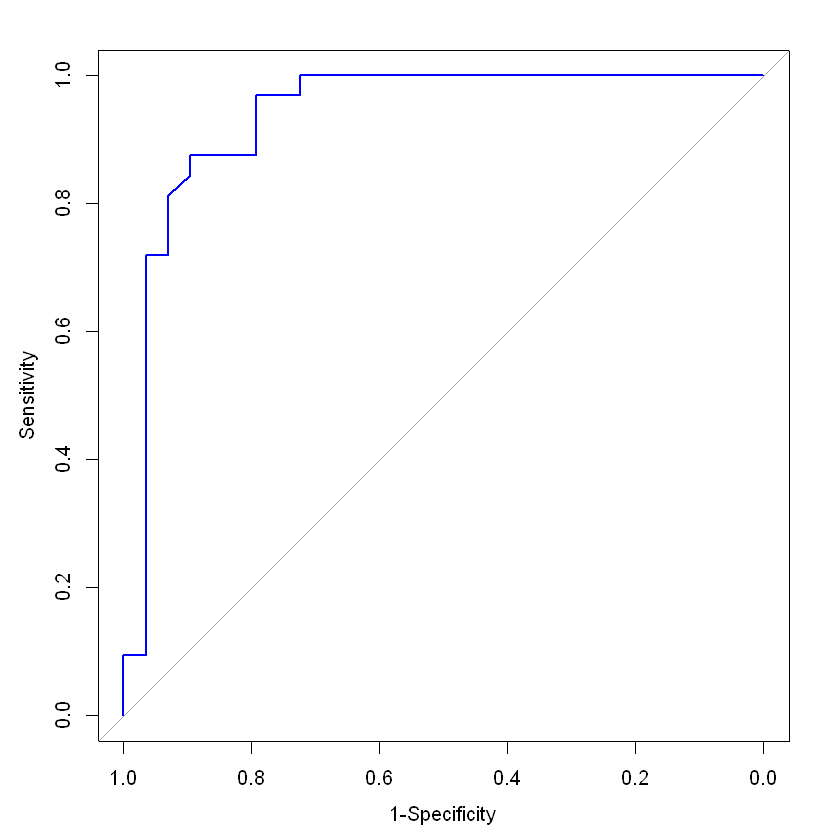

In [27]:
ROC=roc(obs_target_test,pred_prob_test)
plot(ROC,col="blue",xlab="1-Specificity",ylab="Sensitivity")
paste("Area under the curve is: ", auc(ROC))

### Conclusion

From the above analysis, we see that Logistic Resgression, Decision Tree Classifier, Random Forest, SVM can be used to predict whether a person will have heart disease or not. Among these Logistic Regression gives the best performance and hence used in the model and results are obtained. 

We can see that from the test results we have predicted that among 61 people we have correctly predicted the presence of heart disease for 31 people and absence of the same for 21 people thereby giving us an accuracy of 85% which is pretty good for fitting a model. 

Hence we can use logistic regression model for predicting the presence or absence of heart disease.